<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
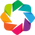

In [1]:
#Arrays and containers
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotnine as p9
from plotnine import ggplot, aes, coord_flip, geom_point, geom_line, geom_col, geom_linerange, geom_errorbarh
from plotnine import geom_density, geom_histogram, geom_bar, scale_x_reverse, scale_y_reverse, facet_grid
import bokeh
from bokeh.sampledata.us_states import data as USA_coords
import holoviews as hv
from holoviews import opts
hv.extension('bokeh', 'matplotlib')



In [2]:
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


# Matplotlib

[Based on lectures.scientific-python.org](https://lectures.scientific-python.org/intro/matplotlib)
[... and Matplotlib documentations](https://matplotlib.org/)


## Basic

In [ ]:
X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, label = 'Cosine($\\theta$)') #We can use latex expressions surrounded by money signs ($) 
plt.plot(X, S, label = 'Sine($\\theta$)')
plt.legend(loc='upper left')
plt.title("My basic plot")
plt.xlabel("Radians $\\theta$") 
plt.ylabel("Value trig. function");

plt.show()



In [ ]:
#Costumize
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue dashed line of width 4 (pixels)
plt.plot(X, C, color="blue", linewidth=4.0, linestyle="--")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9))

# Set y limits
plt.ylim(-1, 1.05)

# Set y ticks
plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$']) #You can change the position and labels of the ticks


#Change splines
# By default, spines are the lines surrounding the figure. 
# We can move them. Comment this and the lines below in or out to check the behavior.
ax = plt.gca()  # gca stands for 'get current axis' i.e. the figure currently active
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

#Annotate
t = 2 * np.pi / 3
plt.plot([t, t], [0, np.cos(t)], color='blue', linewidth=2.5, linestyle="--")
plt.scatter([t, ], [np.cos(t), ], 50, color='blue')

plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)), xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t, t],[0, np.sin(t)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([t, ],[np.sin(t), ], 50, color='red')

plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)), xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


# Save figure using 72 dots per inch
# plt.savefig("exercise_2.png", dpi=72)

# Show result on screen
plt.show()

## Subplots

In [ ]:
fig = plt.figure()
fig.suptitle("Controlling subplot sizes with width_ratios and height_ratios") #sizes can be controlled manually, check https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#gridspec-demo

gs = GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[4, 1]) #creates the specifications of grid to put plots. 
ax1 = fig.add_subplot(gs[0]) #this executes the grid specifications
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])

#annotate_axes(fig)
x = np.linspace(0,10)
y = x
ax1.plot(x,y, color = 'green');
x = np.linspace(0,10)
y = x**2
ax4.plot(x,y, color = 'red');
ax4.set_ylim(0,50) #some axis routines have a different syntax (i.e. not .ylim)

## Exercise (load + clean + bar plot)
### First matplotlib plot

1) Load movies.csv and name it "movies" 
2) Print movies head
3) Print movies variable types
4) Print movies dimensions with the routine .shape
4) Clean the variable Weekend gross. Drop from each entry the sign '$' and transform the string values to integer values. Use a for loop and the routine split.
5) Print movies variable types again
6) With matplotlib, plot an horizontal barplot. Name the axis and write the units. 
7) Save the figure as png and pdf.

## Exercise (load + clean + horizontally stacked bar plot)
### A simple plot can be hard in matplotlib

1) Load income_by_age.csv and name it income_age
2) Erase the column "year" from the database
3) Print income_age head
4) Print income_age variable types
5) Print income_age dimensions with the routine .shape
6) Go from a long format to a wide format. Use the routine .pivot. Place the resulting table in a new variable called age_race. Print it.
7) Reset the index with the routine .reset_index(inplace=True). Print age_race again
8) With matplotlib, plot horizontal stacked bars. That is, do in the same figure a barplot of the median income for each age (x-axis) and race.  
One way to do it:  
[matplotlib horizontal stacked bars](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html)





# Seaborn = Matplotlib + Pandas + Stats

[Based on seaborn docs](https://seaborn.pydata.org/tutorial)

In [ ]:
#The same horizontally stacked bars are easier in other more expressive packages.
#Seaborn is an excellent alternative
file = "Claus_Wilke_Book_Fund_Data_Viz/data/csv_files/income_by_age.csv"
income_age = pd.read_csv(file)
plt.figure(figsize=(10,5))
sns.barplot(income_age, x="age", y="median_income", hue="race") 
plt.xlabel('Age')
plt.ylabel('Median income')
plt.ylim(0,105000);

In [ ]:
# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = pd.read_csv("tips.csv")
print(tips)

# Create a visualization
sns.relplot( #plot type
    data=tips, #data to use
    x="total_bill", y="tip", col="time", #col is for column; so two columns: Dinner and Lunch
    hue="smoker", style="smoker", size="size", 
);

In [ ]:
#Seaborn can visualize standard stats, like OLS (do not expect the coeficients and stuff; that later)
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker");

In [ ]:
sns.displot(data=tips, x="total_bill", col="time", kde=True);

In [ ]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True);

In [ ]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker");

In [ ]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True);

In [ ]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker");

In [ ]:
sns.jointplot(data=tips, x="total_bill", y="tip", hue="smoker");

In [ ]:
sns.pairplot(data=tips, hue="smoker");

In [ ]:
g = sns.PairGrid(tips, hue="smoker", corner=True) #put the info in an object
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

<img src="plot_types_seaborn.png">

## Exercise (load + clean + heatmap)
Elaborated charts with relatively few lines of code

1) Load the data set Internet_user.csv and put it in a variable called Internet
2) print the name of the columns of Internet
3) print the dimensions of Internet with the routine .shape
4) Make a new data called Internet_R with only these countries:
  Iceland, Norway, Japan, France, United States, Mexico, Argentina, Colombia, Kenya, China.
  Use the routine filter. Important: the parameter items in filter only works on names of rows or columns. Thus, temporarily, make the country code the index, and then use .reset_index(drop=True)
5) Print Internet_R head and confirm it has the same number of rows and the countries you asked for.
6) Make a new reduced data called Internet_hm, with only the years i.e. drop the remaining columns
7) Rename the index of Internet_hm with the country names
8) Rename the axis of Internet_hm with the routine .rename_axis(). Call the columns axis year; the index axis country
8) Make a heatmap with seaborn with Internet_hm. Save the figure as png and pdf.

# Grammar of graphics

## ggplot 
As implemented in P9

In [ ]:
#A simple example from p9 documentation
df = pd.DataFrame({
    'letter': ['Alpha', 'Beta', 'Delta', 'Gamma'],
    'pos': [1, 2, 3, 4],
    'num_of_letters': [5, 4, 5, 5]
}) #silly dataset

df

In [ ]:
#This is a nice simple example to see the logic of ggplot grammar of graphics
p = (ggplot(df) #indicate the data to use
 + geom_col(aes(x='letter', y='pos')) #geom 1 (first layer)
 + geom_line(aes(x='letter', y='num_of_letters'), group=1) #geom 2 (second layer)
 + p9.labs(title='Greek Letter Analysis', x = 'Letter', y = 'Position') #misc
)
p

In [ ]:
#Forest plot. See an example in google images
#Plan: we want to tell ggplot to paint dots and confidence intervals
#That is, at least two layers.

#Load data set
file = "Claus_Wilke_Book_Fund_Data_Viz/data/csv_files/cacao.csv"
chocolate = pd.read_csv(file)
countries = np.array(['Switzerland', 'Canada', 'Austria', 'U.S.A.', 'Belgium', 'Peru'])
boolean = ""
for c in countries:
    boolean = boolean + c + "|"
chocolate_R = chocolate[chocolate["location"].str.contains(boolean[0:-1])].reset_index(drop=True)
chocolate_R

In [ ]:
Cho_Stats = chocolate_R.groupby(['location']).agg({'rating': ['mean', 'std']}).reset_index(drop=True)
Cho_Stats.insert(0, 'location', list(chocolate_R.groupby(['location']).indices.keys()))
Cho_Stats.columns = ['location', 'mean_rating', 'std_rating']
Cho_Stats.insert(Cho_Stats.shape[1], 'error_left', Cho_Stats.loc[:,'mean_rating'] - Cho_Stats.loc[:,'std_rating'])
Cho_Stats.insert(Cho_Stats.shape[1], 'error_right', Cho_Stats.loc[:,'mean_rating'] + Cho_Stats.loc[:,'std_rating'])
Cho_Stats.columns = ['location', 'mean_rating', 'std_rating', 'error_left', 'error_right']
p = ggplot(Cho_Stats, aes(y = "location")) + p9.theme_classic()
#p

In [ ]:
p = (p +  
     geom_point(aes(x="mean_rating"), shape="o", size=3) + 
     geom_errorbarh(aes(xmin="error_left", xmax="error_right", y = 'location')) +
     p9.labs(title = "Chocolate Ratings", x = 'Rating', y = 'Country')
    ) 
p

In [ ]:
#Age pyramid (see Figure 7.10 https://clauswilke.com/dataviz/histograms-density-plots.html)
#This one is more complicated. 
#But think it again in terms of layers.
#We need to layers/geoms: one for the female histogram, another for the male histogram

#First let's build the histograms. 
#One problem is that the native geom_histogram only gives us positive counts
#Another problem is that flipping only one scale of a geom (0 to 50 towards negative) is hard 
#So we need to build our histograms to feed as data

h = np.histogram(titanic_male, bins=10)
bin_edges = h[1]
bin_width = np.diff(h[1])[0]
h = np.array([(h[1] + bin_width/2)[0:-1], h[0]]).transpose()
df_m = pd.DataFrame(h, columns = ['Age_center', 'Counts'])

h = np.histogram(titanic_female, bins = bin_edges)
h = np.array([(h[1] + np.diff(h[1])[0]/2)[0:-1], -h[0]]).transpose()
df_f = pd.DataFrame(h, columns = ['Age_center', 'Counts'])

In [ ]:
breaks = np.sort(np.append(np.linspace(-130, 130, df_m.shape[0]), 0))
labels = list(np.array(np.array(np.abs(breaks),dtype=int), dtype = str))
(ggplot() +
 geom_bar(df_f, aes(x='Age_center', y = 'Counts'), stat = "identity", fill = 'blue', width = 0.98*bin_width) +
 geom_bar(df_m, aes(x='Age_center', y = 'Counts'), stat = "identity", fill = 'red', width = 0.98*bin_width) +
 coord_flip() + p9.scale_y_continuous(breaks = breaks, labels = labels, limits = [-130,130]) +
 p9.labs(x = 'Age (Years)') + p9.theme_classic()
)

## Exercise (Densities + Faceting)
Learn to plot on the same chart or on different panels.

1) Load titanic_all.csv data
2) Drop unnecesary columns "name", "class", "survived"
3) Remove NaN
4) Plot, with plotnine, age densities with geom_density: for male, for female. Use facet_grid. Change the defaul theme to one of your preference
5) Do not use facet_grid. Both distributions in the same chart. Fill each sex distribution with color and make it slightly transparent. Change the plot labels and put a title of your liking. Do the same for the legend.

## HoloViews
Based on [HoloViews documentation](https://holoviews.org/getting_started/)

Gallery on [Gallery](https://holoviews.org/reference/index.html) 

HoloViews can render using different libraries. Here we will use bokeh.

In [ ]:
station_info = pd.read_csv('station_info.csv')
station_info.head()

In [ ]:
#A visualization with HoloViews. 
scatter = hv.Scatter(station_info, 'services', 'ridership')
scatter

In [ ]:
#The object scatter is a wrapper of info useful to HoloViews, not a plot object. 
#Scatter is plotting-package agnostic, it works with matplotlib, plotly, or bokeh
#HoloViews objects contain:
#   Your data
#   Metadata specifying what your data is
print(scatter)

In [ ]:
#Composing ... the plus is a shortcut for different pannel
layout = scatter + hv.Histogram(np.histogram(station_info['opened'], bins=24), kdims=['opened'])
layout

In [ ]:
#To reiterate, layout is a wrapper, not a plot object
print(layout)

In [ ]:
#Array data (.npz is a numpy array compressed)
taxi_dropoffs = {hour:arr for hour, arr in np.load('hourly_taxi_data.npz').items()} #Dictionary; each key is an hour
print('Hours: {hours}'.format(hours=', '.join(taxi_dropoffs.keys())))
print('Taxi data contains {num} arrays (one per hour).\nDescription of the first array:\n'.format(num=len(taxi_dropoffs)))
print(np.info(taxi_dropoffs['0']))
taxi_dropoffs['0']

In [ ]:
#Composing ... the times sign crosses both images on the same chart
bounds = (-74.05, 40.70, -73.90, 40.80)
image = hv.Image(taxi_dropoffs['0'], ['lon','lat'], bounds=bounds)
points = hv.Points(station_info, ['lon','lat']).opts(color="red")
image + image * points

In [ ]:
#A holomap it is useful to explora data. It has some interactivity features.
#This holomap is a dictionary with many images
dictionary = {int(hour):hv.Image(arr, ['lon','lat'], bounds=bounds) 
              for hour, arr in taxi_dropoffs.items()} 
holomap = hv.HoloMap(dictionary, kdims='Hour')
print(holomap)
holomap

In [ ]:
#A static version
holomap.select(Hour={3,6,9}).layout()

In [ ]:
#More compositions ... 
#... and see how with .opts we can costumize our plot (check more in https://holoviews.org/getting_started/Customization.html)
hotspot = points.select(lon=(-73.99, -73.96), lat=(40.75,40.765)) #South of Central Park contains many popular tourist attractions, including Times Square
composition = holomap * hotspot

composition.opts(
    opts.Image(xrotation=90),
    opts.Points(color='red', marker='v', size=6)) 

In [ ]:
#A static version
composition.select(Hour=7)

In [ ]:
#Holoviews objects have the relevant slices of data (and other info used by HoloViews)
#That's why the objects can be plotted with different engines 
#see https://holoviews.org/gallery/ for available plots of different engines
hotspot.data

In [ ]:
#You can save to many formats, including html for the interactive stuff
hv.save(composition, 'holomap.html') #the whole interaction, it is a stand alone file, you can send it to anyone and they will see it fine
hv.save(composition.last, 'image.html') #a frame

In [ ]:
#Network plot
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))

colors = ['#000000']+hv.Cycle('Category20').values
edges_df = pd.read_csv('fb_edges.csv')
fb_nodes = hv.Nodes(pd.read_csv('fb_nodes.csv')).sort()
fb_graph = hv.Graph((edges_df, fb_nodes), label='Facebook Circles')

fb_graph.opts(cmap=colors, node_size=10, edge_line_width=1,
              node_line_color='gray', node_color='circle')

## Tabular data

In [ ]:
#Tabular (old plain data we've been using) and gridded data (e.g. 4D objects like fMRI slices, x,y,z,time)
#Let's start with tabular
diseases = pd.read_csv('diseases.csv.gz')
diseases.head()

In [ ]:
#In holoviews, kdim are akin to independent variables (key dimensions)
#Dependent variables are vdim (value dimensions).
#We can create a holoviews data set and put better descriptions to a dimension.

vdims = [('measles', 'Measles Incidence'), ('pertussis', 'Pertussis Incidence')]
ds = hv.Dataset(diseases, ['Year', 'State'], vdims) #Year and State are key, measles and pertussis are value dimensions
ds = ds.aggregate(function=np.mean) #We average over the remaining dimensions i.e. week dimension
ds

In [ ]:
#Now let's plot
#ds.to(plot-type, kdim, vdim) i.e. in natural language ...
#map kdim, vdim to plot-type
#Because state is not in
layout = (ds.to(hv.Curve, 'Year', 'measles') + ds.to(hv.Curve, 'Year', 'pertussis')).cols(1)
layout.opts(
    opts.Curve(width=600, height=250, framewise=True)) 

In [ ]:
#As usual in python, we can compose functions
#More interesting, is that .Bars receives the two key dimensions, State, Year (or flip it)
#and cross them appropietely (under the limits of a barplot)
states = ['New York', 'New Jersey', 'California', 'Texas'] #
bars = ds.select(State=states, Year=(1980, 1990)).to(hv.Bars, ['State', 'Year'], 'measles').sort()
bars.opts(
    opts.Bars(width=800, height=400, tools=['hover'], xrotation=90, show_legend=False))

In [ ]:
#Faceting is straight forward
grouped = ds.select(State=states, Year=(1930, 2005)).to(hv.Curve, 'Year', 'measles')
gridspace = grouped.grid('State')
gridspace.opts(
    opts.Curve(width=200, color='indianred'))

In [ ]:
#Or everything in one plot
ndoverlay = grouped.overlay('State')
ndoverlay.opts(
    opts.Curve(width=600, color=hv.Cycle(values=['indianred', 'slateblue', 'lightseagreen', 'coral'])))

In [ ]:
#Aggregation e.g. useful for error bars
agg = ds.aggregate('Year', function=np.mean, spreadfn=np.std)
errorbars = hv.ErrorBars(agg,vdims=['measles', 'measles_std']).iloc[::2]
overlay =  (hv.Curve(agg) * errorbars).redim.range(measles=(0, None))

overlay.opts(width=600)

## Grided Data
Data across dimensions. Better with and example: an RGB image sequence over time; maps of sales in a region over time; the trafic data on previous examples

In [ ]:
#The data are 2D images across time 
data = np.load('twophoton.npz')
calcium_array = data['Calcium']
calcium_array.shape

In [ ]:
ds = hv.Dataset((np.arange(50), np.arange(111), np.arange(62), calcium_array),
                ['Time', 'x', 'y'], 'Fluorescence')
ds

In [ ]:
#Some defaults for what comes
opts.defaults(
    opts.GridSpace(shared_xaxis=True, shared_yaxis=True),
    opts.Image(cmap='viridis', width=400, height=400),
    opts.Labels(text_color='white', text_font_size='8pt', text_align='left', text_baseline='bottom'),
    opts.Path(color='white'),
    opts.Spread(width=600),
    opts.Overlay(show_legend=False))

In [ ]:
ds.to(hv.Image, ['x', 'y']).hist()

In [ ]:
ROIs = data['ROIs'] #Region of interest
roi_bounds = hv.Path([hv.Bounds(tuple(roi)) for roi in ROIs])
print(ROIs.shape)
labels = hv.Labels([(roi[0], #"x"
                     roi[1], #"y"
                     i) for i, roi in enumerate(ROIs)])
(ds[21].to(hv.Image, ['x', 'y']) * roi_bounds * labels).relabel('Time: 21')

In [ ]:
#A specific region
x0, y0, x1, y1 = ROIs[60]
roi = ds.select(x=(x0, x1), y=(y0, y1), time=(250, 280)).relabel('ROI #60')
roi.to(hv.Image, ['x', 'y'])

In [ ]:
#Another representation
roi.to(hv.Curve, 'Time').grid()

In [ ]:
#Aggregate over space
agg = roi.aggregate('Time', np.mean, spreadfn=np.std)
hv.Spread(agg) * hv.Curve(agg)

## Exercise (Geodata)
Make sure USA_coords was loaded (it should be in the package import section) 
If not, load it with this:
import pickle
with open('USA_coords.pickle', 'rb') as handle:
    b = pickle.load(handle)

Data setup to plot the US map. The info of each state should be in a dictionary. And each dictionary should be an element of a list. We drop Alaska and Hawaii

us_states = [dict(state[1]) for state in USA_coords.items() if (state[0]!="AK") & ((state[0]!="HI")) ]

Now the exercise with HoloViews

1) Load wind_turbines.csv and name it wind_turbines
2) Print wind_turbines head
3) Print wind_turbines columns
4) Drop Alaska (AK), Guam (GU), Hawaii (HI), Puerto Rico (PR) from wind_turbines. Name the reduced data wind_turbines_R
5) Plot the USA map with hv.Polygons. Tip: us_states have the longitudes and latitudes. Make sure the background is white and the frontiers between states black. Name the plot us_map
6) Plot the turbines on wind_turbines_R with hv.Points. Make them red and with the marker 'v'. Name the plot turb_plot
7) Plot us_map and turb_plot on the same chart

# Interactivity

In [79]:
#We already saw some interactivity. Let's check live data
#DynamicMap is the function to use for live data.
#We first need a function
def shapes(N, radius=0.5): # Positional keyword arguments are fine
    paths = [hv.Path([[(radius*np.sin(a), radius*np.cos(a)) 
                        for a in np.linspace(-np.pi, np.pi, n+2)]], 
                     extents=(-1,-1,1,1)) 
             for n in range(N,N+3)]
    return hv.Overlay(paths)



In [81]:
#Now a HoloMap and a dynamic map
#The dynamic map calls the function every time the user interacts
holomap = hv.HoloMap({(N,r):shapes(N, r) for N in [3,4,5,7] for r in [0.5,0.75, 1]},  kdims=['N', 'radius'])
dmap = hv.DynamicMap(shapes, kdims=['N','radius'])
holomap + dmap

:Layout
   .HoloMap.I    :HoloMap   [N,radius]
      :Overlay
         .Path.I   :Path   [x,y]
         .Path.II  :Path   [x,y]
         .Path.III :Path   [x,y]
   .DynamicMap.I :DynamicMap   [N,radius]
      :Overlay
         .Path.I   :Path   [x,y]
         .Path.II  :Path   [x,y]
         .Path.III :Path   [x,y]

In [83]:
#Other example
def clifford_equation(a,b,c,d,x0,y0):
    xn,yn = x0,y0
    coords = [(x0,y0)]
    for i in range(10000):
        x_n1 = np.sin(a*yn) + c*np.cos(a*xn)
        y_n1 = np.sin(b*xn) + d*np.cos(b*yn)
        xn,yn = x_n1,y_n1
        coords.append((xn,yn))
    return coords

def clifford_attractor(a,b,c,d):
    return hv.Points(clifford_equation(a,b,c,d,x0=0,y0=0))

In [82]:
opts.defaults(
    opts.Curve(color='black'),
    opts.Points(color='red', alpha=0.1, width=400, height=400))

In [84]:
clifford = hv.DynamicMap(clifford_attractor, kdims=['a','b','c','d'])
clifford.redim.range(a=(-1.5,-1),b=(1.5,2),c=(1,1.2),d=(0.75,0.8), x=(-2,2), y=(-2,2))

:DynamicMap   [a,b,c,d]
   :Points   [x,y]

### DO AN alluvial_diagram with one package!! e.g. https://github.com/vinsburg/alluvial_diagram